# **BOOTCAMP @ GIKI (Content designed by Usama Arshad) WEEK 3**

---



Week 3: Day 15 - GANs

## Introduction to Generative Adversarial Networks (GANs)

### Overview

Generative Adversarial Networks (GANs) are a class of machine learning frameworks designed by Ian Goodfellow and his colleagues in 2014. GANs consist of two neural networks, the generator and the discriminator, which are trained simultaneously through adversarial processes. The generator creates data that mimics real data, while the discriminator evaluates the authenticity of the generated data. The competition between these two networks improves the quality of the generated data over time.

### Components of GANs

#### Generator

The generator is a neural network that takes random noise as input and transforms it into data resembling the real dataset. The goal of the generator is to produce data that the discriminator cannot distinguish from the real data.

#### Discriminator

The discriminator is a neural network that takes either real data or generated data as input and classifies it as real or fake. The goal of the discriminator is to accurately distinguish between the real data and the data generated by the generator.

### How GANs Work

1. **Noise Input**: The generator receives random noise (typically from a Gaussian distribution) as input.
2. **Data Generation**: The generator transforms the noise into data (e.g., images) that mimics the real dataset.
3. **Discrimination**: The discriminator evaluates the data, classifying it as real or fake.
4. **Loss Calculation**: The loss is calculated for both the generator and the discriminator. The generator's loss reflects its success in fooling the discriminator, while the discriminator's loss reflects its success in correctly identifying real and fake data.
5. **Adversarial Training**: The generator and discriminator are updated to minimize their respective losses. The generator improves to produce more realistic data, while the discriminator becomes better at identifying fake data.

### Training Process

#### Discriminator Training:

1. Real data and generated data are fed into the discriminator.
2. The discriminator's weights are updated to minimize the loss, improving its ability to distinguish real from fake data.

#### Generator Training:

1. Random noise is fed into the generator to produce fake data.
2. The fake data is then fed into the discriminator.
3. The generator's weights are updated to maximize the discriminator's loss, effectively training the generator to produce more realistic data.

#### Iterative Process:

Steps 1 and 2 are repeated for many iterations, with the generator and discriminator continuously improving in their respective tasks.

---


![GANs Overview](https://camo.githubusercontent.com/2676e99eaa7230e3c4e2f5ce9bb66982ef6b3350680ba31036e8ef17fb6b0a7d/687474703a2f2f6572696b6c696e6465726e6f72656e2e73652f696d616765732f67616e5f6d6e697374352e676966)



---

![GANs Overview](https://miro.medium.com/v2/resize:fit:1400/1*YWM0LmH0HLktBpZRyL_9jw.gif)

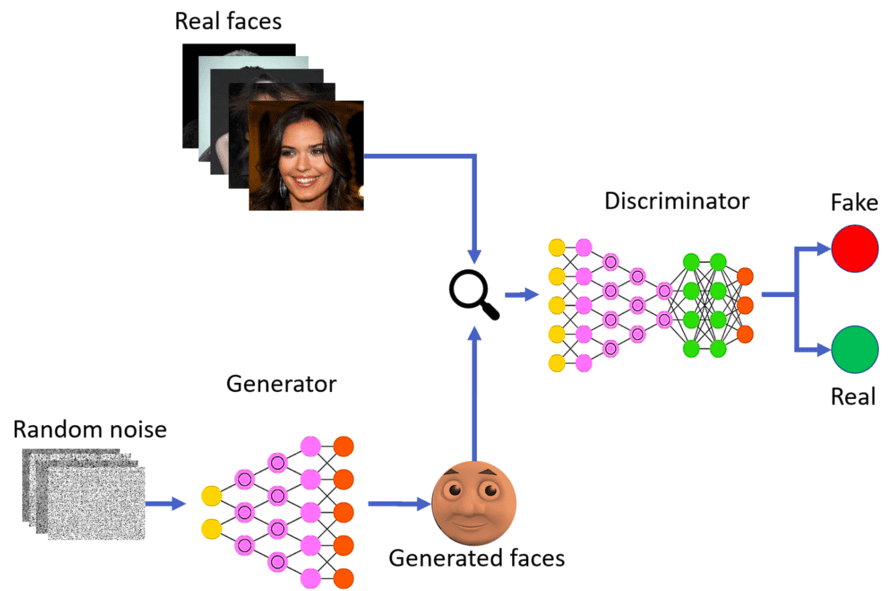

In [ ]:
pip install numpy matplotlib tensorflow


In [ ]:
# Cell 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten, Reshape, LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Load and preprocess the MNIST dataset
def load_data():
    (x_train, _), (_, _) = mnist.load_data()
    x_train = (x_train.astype(np.float32) - 127.5) / 127.5
    x_train = np.expand_dims(x_train, axis=-1)
    return x_train

# Define the generator model
def build_generator():
    model = Sequential()
    model.add(Dense(256, input_dim=100))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(28 * 28 * 1, activation='tanh'))
    model.add(Reshape((28, 28, 1)))
    return model

# Define the discriminator model
def build_discriminator():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28, 1)))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Define the GAN by combining generator and discriminator
def build_gan(generator, discriminator):
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    return model


4/4 [==============================] - 1s 12ms/step
0 [D loss: 0.6575999855995178] [G loss: 0.7572702169418335]
1/1 [==============================] - 0s 89ms/step


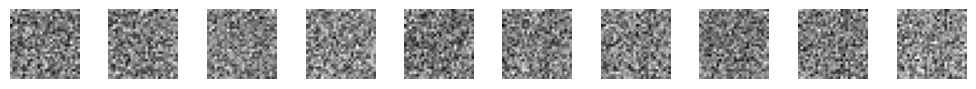

4/4 [==============================] - 0s 8ms/step
1000 [D loss: 0.6139517426490784] [G loss: 1.2316854000091553]
1/1 [==============================] - 0s 24ms/step


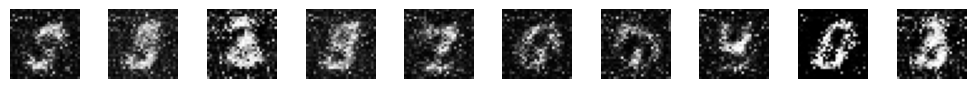

4/4 [==============================] - 0s 9ms/step
2000 [D loss: 0.4344523251056671] [G loss: 1.5135061740875244]
1/1 [==============================] - 0s 25ms/step


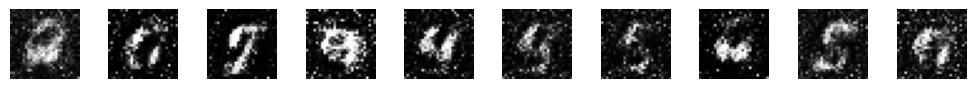

4/4 [==============================] - 0s 9ms/step
3000 [D loss: 0.5632337033748627] [G loss: 1.1440942287445068]
1/1 [==============================] - 0s 28ms/step


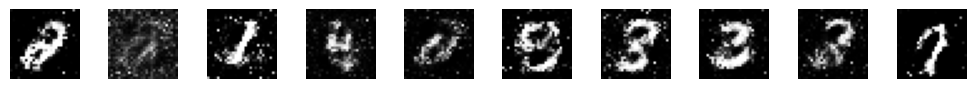

4/4 [==============================] - 0s 11ms/step
4000 [D loss: 0.5874824523925781] [G loss: 1.0169284343719482]
1/1 [==============================] - 0s 32ms/step


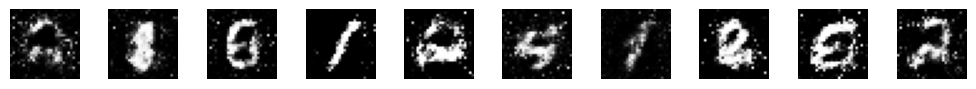

4/4 [==============================] - 0s 8ms/step
5000 [D loss: 0.6007280945777893] [G loss: 0.967339038848877]
1/1 [==============================] - 0s 28ms/step


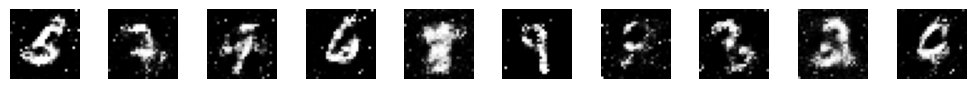

4/4 [==============================] - 0s 16ms/step
6000 [D loss: 0.643126517534256] [G loss: 0.9645364284515381]
1/1 [==============================] - 0s 26ms/step


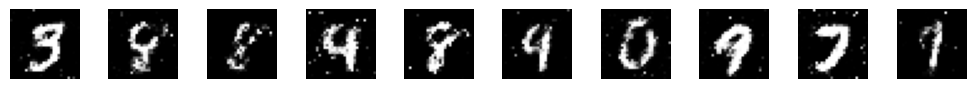

4/4 [==============================] - 0s 8ms/step
7000 [D loss: 0.6241636872291565] [G loss: 1.0362739562988281]
1/1 [==============================] - 0s 41ms/step


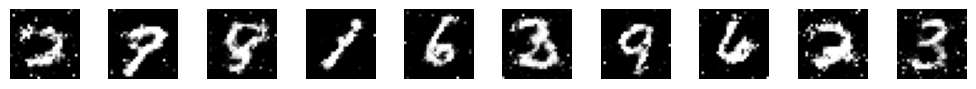

4/4 [==============================] - 0s 9ms/step
8000 [D loss: 0.6595155000686646] [G loss: 0.8682820796966553]
1/1 [==============================] - 0s 30ms/step


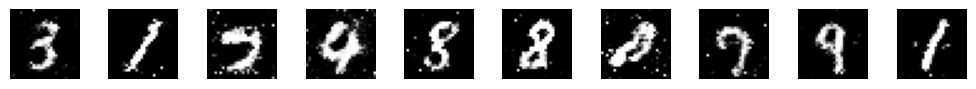

4/4 [==============================] - 0s 11ms/step
9000 [D loss: 0.6354472041130066] [G loss: 1.0614802837371826]
1/1 [==============================] - 0s 37ms/step


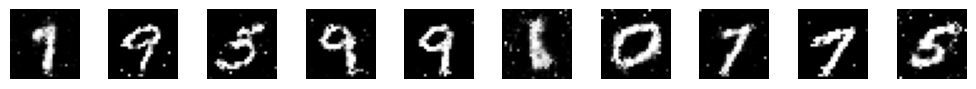

4/4 [==============================] - 0s 9ms/step


In [ ]:
# Cell 2: Compile and train the GAN
def train_gan(generator, discriminator, gan, epochs=10000, batch_size=128):
    # Load and prepare the dataset
    x_train = load_data()

    # Labels for real and fake images
    real = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for epoch in range(epochs):
        # Train the discriminator
        idx = np.random.randint(0, x_train.shape[0], batch_size)
        real_imgs = x_train[idx]

        noise = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(real_imgs, real)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train the generator
        noise = np.random.normal(0, 1, (batch_size, 100))
        g_loss = gan.train_on_batch(noise, real)

        # Print the progress
        if epoch % 1000 == 0:
            print(f"{epoch} [D loss: {d_loss[0]}] [G loss: {g_loss}]")
            save_images(generator, epoch)

# Save generated images for visualization
def save_images(generator, epoch, examples=10, dim=(1, 10), figsize=(10, 1)):
    noise = np.random.normal(0, 1, (examples, 100))
    generated_images = generator.predict(noise)
    generated_images = 0.5 * generated_images + 0.5

    plt.figure(figsize=figsize)
    for i in range(examples):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i, :, :, 0], cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig(f"gan_generated_image_epoch_{epoch}.png")
    plt.show()

# Build and compile the discriminator
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])

# Build the generator
generator = build_generator()

# Keep the discriminator's parameters constant for the combined model
discriminator.trainable = False

# Build and compile the GAN
gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

# Train the GAN
train_gan(generator, discriminator, gan)


1/1 [==============================] - 0s 31ms/step


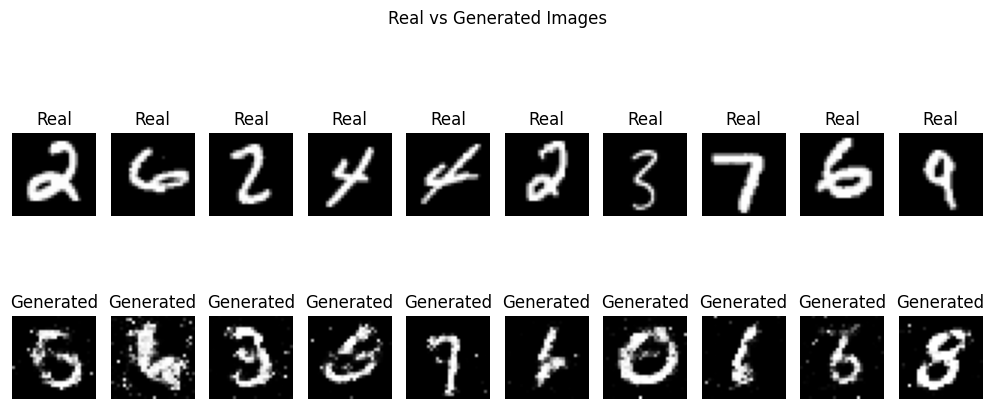

In [ ]:
# Cell 3: Visualize real vs generated images after training
def visualize_real_vs_generated(generator, examples=10, figsize=(10, 5)):
    x_train = load_data()
    real_imgs = x_train[np.random.randint(0, x_train.shape[0], examples)]
    noise = np.random.normal(0, 1, (examples, 100))
    gen_imgs = generator.predict(noise)
    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(2, examples, figsize=figsize)
    for i in range(examples):
        axs[0, i].imshow(real_imgs[i, :, :, 0], cmap='gray')
        axs[0, i].axis('off')
        axs[0, i].set_title("Real")

        axs[1, i].imshow(gen_imgs[i, :, :, 0], cmap='gray')
        axs[1, i].axis('off')
        axs[1, i].set_title("Generated")

    plt.suptitle("Real vs Generated Images")
    plt.tight_layout()
    plt.savefig("real_vs_generated.png")
    plt.show()

# Visualize real vs generated images
visualize_real_vs_generated(generator)
